In [ ]:
!python --version

Python 3.10.12


In [ ]:
! pip install micromlgen

  Preparing metadata (setup.py) ... done
  Created wheel for micromlgen: filename=micromlgen-1.1.28-py3-none-any.whl size=32153 sha256=e054af253f050607dde6f0e0e534a6bc7082269354ca4947168152fe5518b48d
  Stored in directory: /root/.cache/pip/wheels/97/54/64/5d82c310920abe1be0d120313ceb9e12c88f5701f53f6ed248
Successfully built micromlgen


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from micromlgen import port

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/My Drive/Tesis/Dataset/nuevo_dataset_prueba.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
y = data['Humedad']
#y = data['CSS BRIX°']
X =data[['NIR_R', 'NIR_S', 'NIR_T', 'NIR_U', 'NIR_V', 'NIR_W', 'Vis_Violet', 'Vis_Blue', 'Vis_Green', 'Vis_Yellow', 'Vis_Orange', 'Vis_Red']]

In [ ]:
# Dividir datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Definir los parámetros de regularización
min_samples_split = 5  # Número mínimo de muestras para dividir un nodo
min_samples_leaf = 2  # Número mínimo de muestras en una hoja
max_depth = 5  # Profundidad máxima del árbol

# Ajustar un modelo de árbol de decisión con regularización
model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
modelo =model.fit(X_train, y_train)

# Imprimir el código C++ para microcontroladores
print(port(modelo))

# Obtener el código C++ para microcontroladores
codigo_cxx = port(modelo)

# Guardar el código en un archivo
nombre_archivo = "Arbol.txt"
with open(nombre_archivo, "w") as archivo:
    print(codigo_cxx, file=archivo)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class DecisionTreeRegressor {
                public:
                    /**
                    * Predict class for features vector
                    */
                    float predict(float *x) {
                        if (x[8] <= 1100.3375244140625) {
                            if (x[6] <= 671.8280029296875) {
                                if (x[1] <= 408.6899871826172) {
                                    return 58.69576791687097f;
                                }

                                else {
                                    if (x[3] <= 162.4029998779297) {
                                        if (x[5] <= 84.56100082397461) {
                                            return 49.539571366668326f;
                                        }

                                        else {
                                            return 51.682245551

In [ ]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Rendimiento del modelo con regularización:")
print("MSE:", mse)
print("R-cuadrado:", r2)

print(X_test[0:1])
print(y_pred[0])

Rendimiento del modelo con regularización:
MSE: 4.873944693369309
R-cuadrado: 0.7899628852468359
       NIR_R    NIR_S    NIR_T    NIR_U    NIR_V   NIR_W  Vis_Violet  \
83  2240.319  754.018  199.185  109.068  146.565  87.921     423.837   

    Vis_Blue  Vis_Green  Vis_Yellow  Vis_Orange   Vis_Red  
83   353.905    484.946     860.277    1095.734  1209.172  
51.682245551950814


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from micromlgen import port
from google.colab import drive
!python --version
! pip install micromlgen
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/My Drive/Tesis/Dataset/nuevo_dataset_prueba.csv")
y = data['°BRIX'] # Cambio: usar 'CSS BRIX°' como variable objetivo
X =data[['NIR_R', 'NIR_S', 'NIR_T', 'NIR_U', 'NIR_V', 'NIR_W', 'Vis_Violet', 'Vis_Blue', 'Vis_Green', 'Vis_Yellow', 'Vis_Orange', 'Vis_Red']]
# Dividir datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Definir los parámetros de regularización
min_samples_split = 5  # Número mínimo de muestras para dividir un nodo
min_samples_leaf = 2  # Número mínimo de muestras en una hoja
max_depth = 5  # Profundidad máxima del árbol

# Ajustar un modelo de árbol de decisión con regularización
model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
modelo =model.fit(X_train, y_train)

# Imprimir el código C++ para microcontroladores
print(port(modelo))

# Obtener el código C++ para microcontroladores
codigo_cxx = port(modelo)

# Guardar el código en un archivo
nombre_archivo = "Arbol_Brix.txt" # Cambiar nombre de archivo para Brix
with open(nombre_archivo, "w") as archivo:
    print(codigo_cxx, file=archivo)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Rendimiento del modelo con regularización (Brix):") # Indicar que es para Brix
print("MSE:", mse)
print("R-cuadrado:", r2)

print(X_test[0:1])
print(y_pred[0])


Python 3.10.12
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class DecisionTreeRegressor {
                public:
                    /**
                    * Predict class for features vector
                    */
                    float predict(float *x) {
                        if (x[8] <= 1181.655029296875) {
                            if (x[6] <= 446.68800354003906) {
                                if (x[1] <= 524.5814971923828) {
                                    if (x[1] <= 408.6899871826172) {
                                        return 7.753937782316221f;
                                    }

                                    else {
                                        if (x[7] <= 329.3354949951172) {
                                            return 8.256219869330335f

In [ ]:
import pandas as pd
!python --version
! pip install micromlgen
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/My Drive/Tesis/Dataset/nuevo_dataset_prueba.csv")
y = data['pH'] # Cambio: usar 'pH' como variable objetivo
X =data[['NIR_R', 'NIR_S', 'NIR_T', 'NIR_U', 'NIR_V', 'NIR_W', 'Vis_Violet', 'Vis_Blue', 'Vis_Green', 'Vis_Yellow', 'Vis_Orange', 'Vis_Red']]
# Dividir datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Definir los parámetros de regularización
min_samples_split = 5  # Número mínimo de muestras para dividir un nodo
min_samples_leaf = 2  # Número mínimo de muestras en una hoja
max_depth = 5  # Profundidad máxima del árbol

# Ajustar un modelo de árbol de decisión con regularización
model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
modelo =model.fit(X_train, y_train)

# Imprimir el código C++ para microcontroladores
print(port(modelo))

# Obtener el código C++ para microcontroladores
codigo_cxx = port(modelo)

# Guardar el código en un archivo
nombre_archivo = "Arbol_pH.txt" # Cambiar nombre de archivo para pH
with open(nombre_archivo, "w") as archivo:
    print(codigo_cxx, file=archivo)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Rendimiento del modelo con regularización (pH):") # Indicar que es para pH
print("MSE:", mse)
print("R-cuadrado:", r2)

print(X_test[0:1])
print(y_pred[0])


Python 3.10.12
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class DecisionTreeRegressor {
                public:
                    /**
                    * Predict class for features vector
                    */
                    float predict(float *x) {
                        if (x[8] <= 1230.5780029296875) {
                            if (x[11] <= 1245.5830078125) {
                                if (x[11] <= 525.2369995117188) {
                                    return 6.264349032115867f;
                                }

                                else {
                                    if (x[1] <= 774.2005004882812) {
                                        if (x[4] <= 116.41400146484375) {
                                            return 6.52964833654522f;
          

In [ ]:
# prompt: Realizar lo mismo de anteriormente pero con variables para IM

import pandas as pd
!python --version
! pip install micromlgen
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/My Drive/Tesis/Dataset/nuevo_dataset_prueba.csv")
y = data['IM'] # Cambio: usar 'IM' como variable objetivo
X =data[['NIR_R', 'NIR_S', 'NIR_T', 'NIR_U', 'NIR_V', 'NIR_W', 'Vis_Violet', 'Vis_Blue', 'Vis_Green', 'Vis_Yellow', 'Vis_Orange', 'Vis_Red']]
# Dividir datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Definir los parámetros de regularización
min_samples_split = 5  # Número mínimo de muestras para dividir un nodo
min_samples_leaf = 2  # Número mínimo de muestras en una hoja
max_depth = 5  # Profundidad máxima del árbol

# Ajustar un modelo de árbol de decisión con regularización
model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
modelo =model.fit(X_train, y_train)

# Imprimir el código C++ para microcontroladores
print(port(modelo))

# Obtener el código C++ para microcontroladores
codigo_cxx = port(modelo)

# Guardar el código en un archivo
nombre_archivo = "Arbol_IM.txt" # Cambiar nombre de archivo para IM
with open(nombre_archivo, "w") as archivo:
    print(codigo_cxx, file=archivo)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Rendimiento del modelo con regularización (IM):") # Indicar que es para IM
print("MSE:", mse)
print("R-cuadrado:", r2)

print(X_test[0:1])
print(y_pred[0])



Python 3.10.12
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class DecisionTreeRegressor {
                public:
                    /**
                    * Predict class for features vector
                    */
                    float predict(float *x) {
                        if (x[8] <= 1100.3375244140625) {
                            if (x[6] <= 546.4729919433594) {
                                if (x[1] <= 524.5814971923828) {
                                    if (x[11] <= 1314.0675048828125) {
                                        if (x[11] <= 601.6010131835938) {
                                            return 37.809971411502374f;
                                        }

                                        else {
                                            return 42

# Modelo de Clasificacion


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from micromlgen import port
from google.colab import drive
drive.mount('/content/drive')

# Cargar tu conjunto de datos
data = pd.read_csv("/content/drive/My Drive/Tesis/Dataset/nuevo_dataset_prueba.csv")

# Separar las características (X) y las etiquetas (y)
X = data[['NIR_R', 'NIR_S', 'NIR_T', 'NIR_U', 'NIR_V', 'NIR_W', 'Vis_Violet', 'Vis_Blue', 'Vis_Green', 'Vis_Yellow', 'Vis_Orange', 'Vis_Red']]
y = data['Clase (R=0,A=1)']

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definir el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
modelo=model.fit(X_train, y_train)
# Guardar el modelo
# Guardar el modelo

# Evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


# Imprimir el código C++ para microcontroladores
print(port(modelo))

# Obtener el código C++ para microcontroladores
codigo_cxx = port(modelo)

# Guardar el código en un archivo
nombre_archivo = "Arbol_IM.txt" # Cambiar nombre de archivo para IM
with open(nombre_archivo, "w") as archivo:
    print(codigo_cxx, file=archivo)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy: 0.95
#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class DecisionTree {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        if (x[8] <= -0.23128797113895416) {
                            if (x[1] <= -1.2261440753936768) {
                                return 1;
                            }

                            else {
                                return 0;
                            }
                        }

                        else {
                            if (x[7] <= 0.2584883123636246) {
                                if (x[3] <= 0.26049094647169113) {
                                    if (x[2] <= -0.63287690281867

Matriz de Confusión:
[[10  0]
 [ 1  9]]


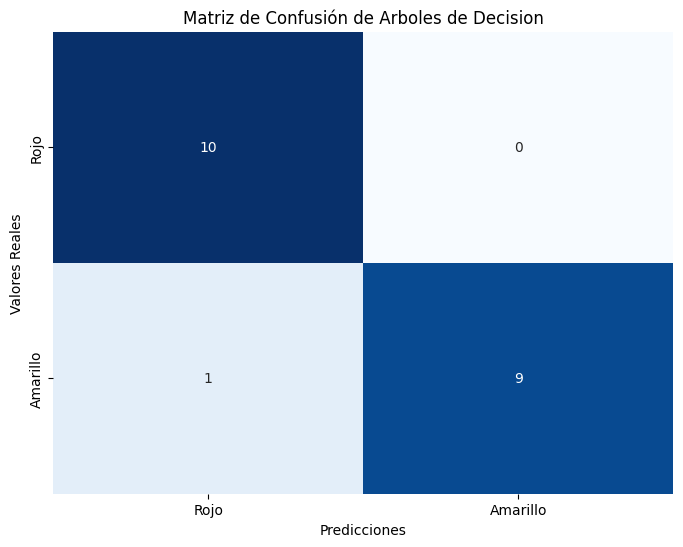

In [ ]:

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(cm)

# Graficar la matriz de confusión con colores personalizados
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión de Arboles de Decision')

# Cambiar las etiquetas de los ejes
tick_labels = ['Rojo', 'Amarillo']
plt.xticks([0.5, 1.5], tick_labels)
plt.yticks([0.5, 1.5], tick_labels)

plt.show()


In [ ]:
# prompt: sacar estas metricas accuracy
# precision
# recall
# f1

from sklearn.metrics import precision_score, recall_score, f1_score

# ... (código anterior)

# Evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

# ... (resto del código)


Accuracy: 0.95
Precision: 1.0
Recall: 0.9
F1-score: 0.9473684210526316
